In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('C:/Users/admin/Downloads/LetsUpgade/dataset/Linear Regression.xlsx')
df.head(6)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
5,1225000,5420,4,4.50,1.0


In [3]:
df.describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

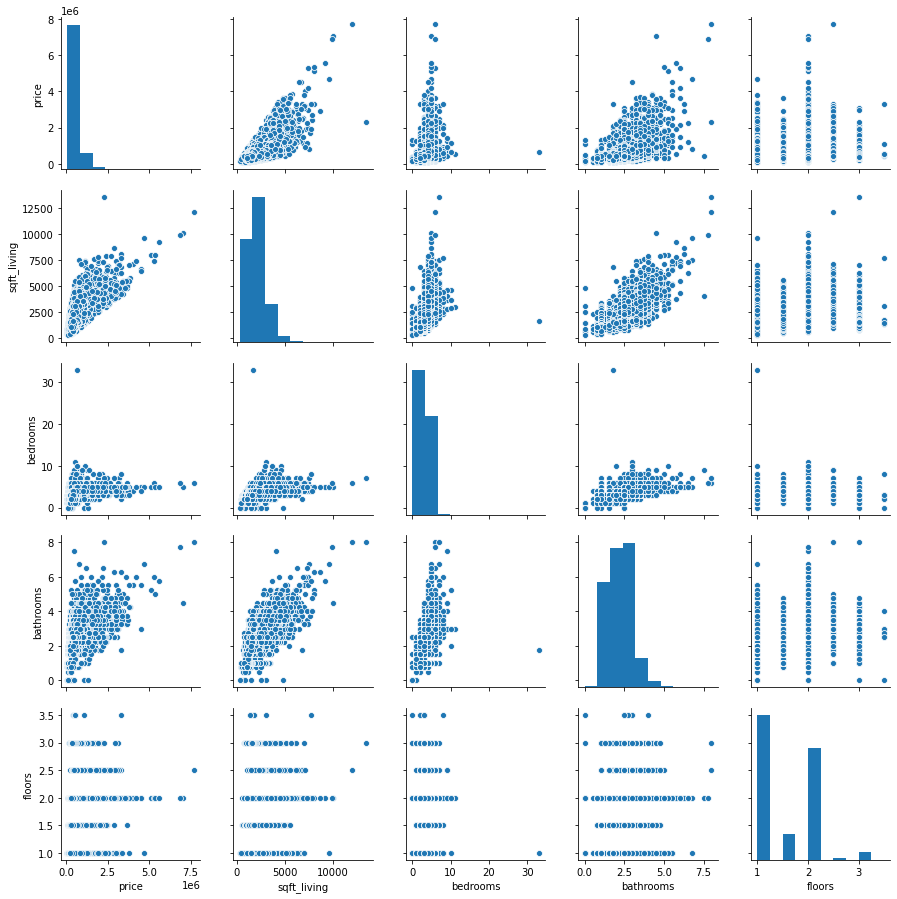

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Built a model for univariate (One by One for each column)

__Linear Regression: It's used to find the relation between dependent variable and independent variables.__

__Here Dependent Variable is 'Price' Attribute.__

__Simple Linear Regression between Dependent variable "Price" and ID variable "sqft_living".__ 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [9]:
train, test = train_test_split(df, test_size= 0.3, random_state = 0)
lr = LinearRegression()

In [10]:
y_train = train['price']
y_test = test['price']

In [11]:
x_train = train.loc[:,['sqft_living']]
x_test = test.loc[:,['sqft_living']]

In [12]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predict = lr.predict(x_test)

In [14]:
print('Mean absolute error for the prediction:', mean_squared_error(y_test, predict))
print('Coefficient of determination(R^2) value for the prediction:', r2_score(y_test, predict))

Mean absolute error for the prediction: 70170012488.97433
Coefficient of determination(R^2) value for the prediction: 0.4888992838225231


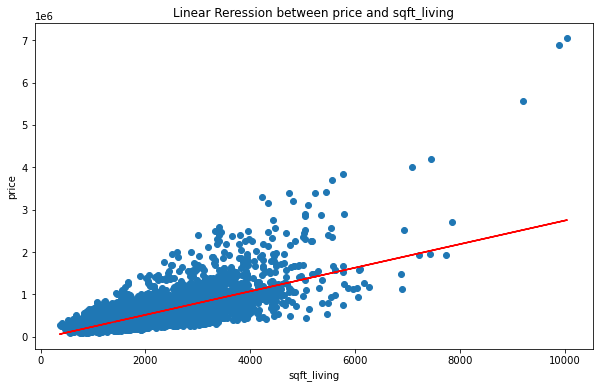

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(test['sqft_living'], test['price'])
plt.plot(test['sqft_living'],predict,  'r')
plt.xlabel( 'sqft_living')
plt.ylabel('price')
plt.title('Linear Reression between price and sqft_living')
plt.show()

__Apply Simple Linear Regression with ID variable "bedrooms".__

In [16]:
x_train = train.loc[:,['bedrooms']]
x_test = test.loc[:,['bedrooms']]

In [17]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predict= lr.predict(x_test)
predict

array([374793.31134634, 617650.27612113, 374793.31134634, ...,
       496221.79373374, 496221.79373374, 496221.79373374])

In [19]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lr.fit(x_train, y_train)
predict = lr.predict(x_test)

In [20]:
x_train

array([[ 0.67170039],
       [-0.38696772],
       [ 1.7303685 ],
       ...,
       [-0.38696772],
       [ 0.67170039],
       [ 0.67170039]])

In [21]:
print('Mean absolute error for the prediction:', mean_squared_error(y_test, predict))
print('Coefficient of determination(R^2) value for the prediction:', r2_score(y_test, predict))

Mean absolute error for the prediction: 125293414171.96083
Coefficient of determination(R^2) value for the prediction: 0.08739429502492246


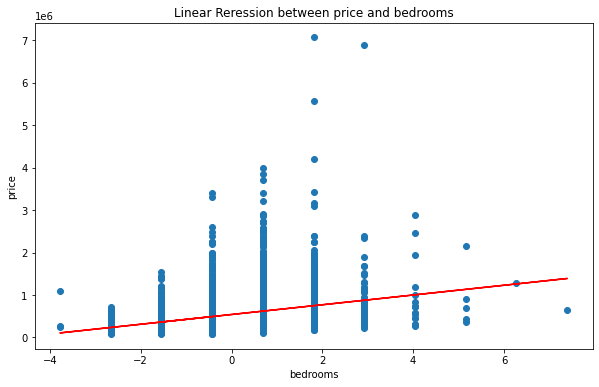

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test)
plt.plot(x_test,predict,  'r')
plt.xlabel( 'bedrooms')
plt.ylabel('price')
plt.title('Linear Reression between price and bedrooms')
plt.show()

### Apply Simple Linea Regression with ID variables "bathrooms".

In [23]:
x_train = train.loc[:,['bathrooms']]
x_test = test.loc[:,['bathrooms']]

In [24]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
predict = lr.predict(x_test)
predict

array([388089.1191871 , 822051.26818571, 202105.34104484, ...,
       636067.49004345, 450083.71190119, 264099.93375893])

In [26]:
print('Mean absolute error for the prediction:', mean_squared_error(y_test, predict))
print('Coefficient of determination(R^2) value for the prediction:', r2_score(y_test, predict))

Mean absolute error for the prediction: 98838239249.46533
Coefficient of determination(R^2) value for the prediction: 0.28008713303193356


### Apply Simple Linear Regression with ID variable  "floors".

In [27]:
x_train = train.loc[:,['floors']]
x_test = test.loc[:,['floors']]

In [28]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
predict = lr.predict(x_test)
predict

array([800986.15002601, 627522.16188257, 454058.17373912, ...,
       540790.16781085, 454058.17373912, 454058.17373912])

In [30]:
print('Mean absolute error for the prediction:', mean_squared_error(y_test, predict))
print('Coefficient of determination(R^2) value for the prediction:', r2_score(y_test, predict))

Mean absolute error for the prediction: 128342354239.68298
Coefficient of determination(R^2) value for the prediction: 0.06518658268569699


__The Accuracy for the features like "floors", "bathrooms", "bedrooms" have low accuracy score bcz they are categorical variables and LinearRegression works best for the Continous variables.__

__So, we can apply other model to increase accuracy of our model like, Decision tree, SVM etc..__

## By using statsmodels package.

In [31]:
train_df = df.drop(['price'], axis=1)
test_df = df['price']
x_sim_reg = sm.add_constant(train_df)
df_sm = sm.OLS(test_df, x_sim_reg).fit()

In [32]:
df_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5554.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:21:02   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         6.000e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.467e+04   7679.122      9.724      0.000    5.96e+04    8.97e+04
sqft_living   309.3932      3.087    100.228      0.000     303.343     315.444
bedrooms    -5.785e+04   2347.323    -24.644      0.000   -6.24e+04   -5.32e+04
bathrooms    7853.5235   3814.223      2.059      0.040     377.365    1.53e+04
floors        200.4943   3775.505      0.053      0.958   -7199.774    7600.763
==============================================================================
Omnibus:                    14450.413   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494760.938
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.790   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Linear Regression equation for price and sqft_living variables is: y = 7.467e+04 + 309.393(sqft_living)+ (-5.785e+04)(bedrooms)+ 7853.5235(bathrooms)+ 200.4943(floors)__

## Apply Linear Regression Model and make prediction for test data 

In [33]:
x_train = train.drop('price', axis=1)
x_test = test.drop('price', axis=1)

In [34]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
predict = lr.predict(x_test)
predict

array([ 418082.2070007 , 1306707.47771871,  409588.1373233 , ...,
        583468.89595792,  373227.82730922,  321070.6451827 ])

In [36]:
print('Mean absolute error for the prediction:', mean_squared_error(y_test, predict))
print('Coefficient of determination(R^2) value for the prediction:', r2_score(y_test, predict))

Mean absolute error for the prediction: 67777154116.33976
Coefficient of determination(R^2) value for the prediction: 0.5063282621650447


__So, by this we can say that our model is not good accurate model, it has a very high mean absolute error and very low correlation coefficient.__

__We need more data to improve accuracy of our model.__

__So, we can apply other model to increase accuracy of our model like, Decision tree, SVM etc..__